Import libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Import excel file

In [3]:
# Load the Excel file
df = pd.read_excel("/content/DataHackathon.xlsx", engine="openpyxl")

print(df.head())

  Orden de Venta Creacion Orden de Venta Codigo Cliente  Articulo  Cantidad  \
0      ABC063830              2021-01-04       F26E901B  IVP11576        60   
1      ABC063832              2021-01-04       12558C43  IVP07229       540   
2      ABC063833              2021-01-04       A760F354  IVP04039         3   
3      ABC063834              2021-01-04       A760F354  IVP04039         4   
4      ABC063835              2021-01-04       A760F354  IVP01010         1   

  Unidad de venta  
0               L  
1              KG  
2             PZA  
3             PZA  
4             PZA  




---



Exploratory Data Analysis

In [4]:
df = df.drop(columns=["Orden de Venta", "Codigo Cliente", "Unidad de venta"])

In [5]:
df = df.rename(columns={"Creacion Orden de Venta": "Fecha"})

In [6]:
df

,Fecha,Articulo,Cantidad
0,2021-01-04,IVP11576,60
1,2021-01-04,IVP07229,540
2,2021-01-04,IVP04039,3
3,2021-01-04,IVP04039,4
4,2021-01-04,IVP01010,1
...,...,...,...
31151,2023-12-29,IVP04039,135
31152,2023-12-29,IVP08034,30
31153,2023-12-29,IVP04039,36
31154,2023-12-29,IVP11694,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31156 entries, 0 to 31155
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     31156 non-null  datetime64[ns]
 1   Articulo  31156 non-null  object        
 2   Cantidad  31156 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 730.3+ KB


In [8]:
# Convert Date column to datetime format
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Aggregate data to sum the amount of items per day
df_grouped = df.groupby("Fecha")["Cantidad"].sum().reset_index()

In [9]:
# Ensure the 'date' column is in datetime format
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Filter for 2023 and 2024
df_filtered = df[df['Fecha'].dt.year.isin([2023, 2024])]


In [10]:
df_grouped = df.groupby("Fecha")["Articulo"].count().reset_index()
df_grouped.rename(columns={"Código": "Total_Compras"}, inplace=True)

print(df_grouped)


         Fecha  Articulo
0   2021-01-04        22
1   2021-01-05        53
2   2021-01-06        24
3   2021-01-07        24
4   2021-01-08       105
..         ...       ...
878 2023-12-23         1
879 2023-12-26        17
880 2023-12-27        23
881 2023-12-28        20
882 2023-12-29         5

[883 rows x 2 columns]


Graph

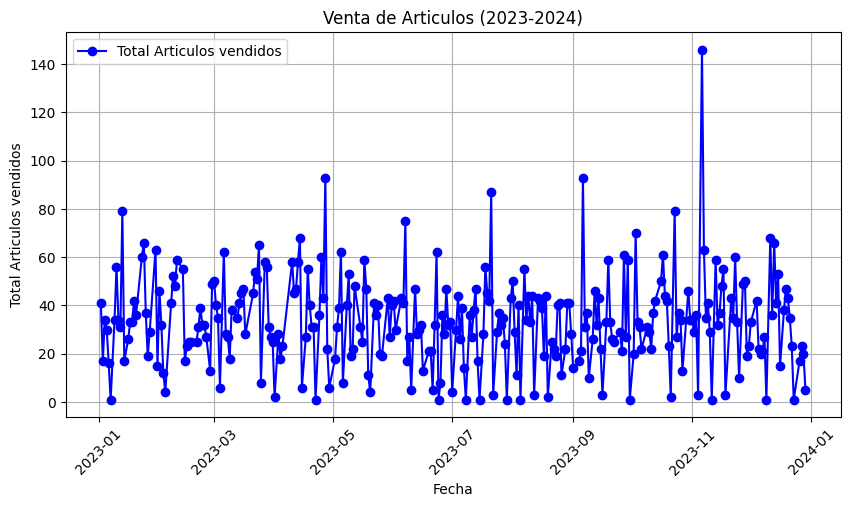

In [11]:
# Filter data for 2023 and 2024
df_filtered = df[(df['Fecha'].dt.year == 2023) | (df['Fecha'].dt.year == 2024)]

# Group by Fecha and count Articulo for the filtered data
df_grouped = df_filtered.groupby("Fecha")["Articulo"].count().reset_index()

df_grouped.rename(columns={"Articulo": "Total_Articulos_Vendidos"}, inplace=True)

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_grouped["Fecha"], df_grouped["Total_Articulos_Vendidos"], marker="o", linestyle="-", color="b", label="Total Articulos vendidos")

# Formatting the plot
plt.xlabel("Fecha")
plt.ylabel("Total Articulos vendidos")
plt.title("Venta de Articulos (2023-2024)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Prediction model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


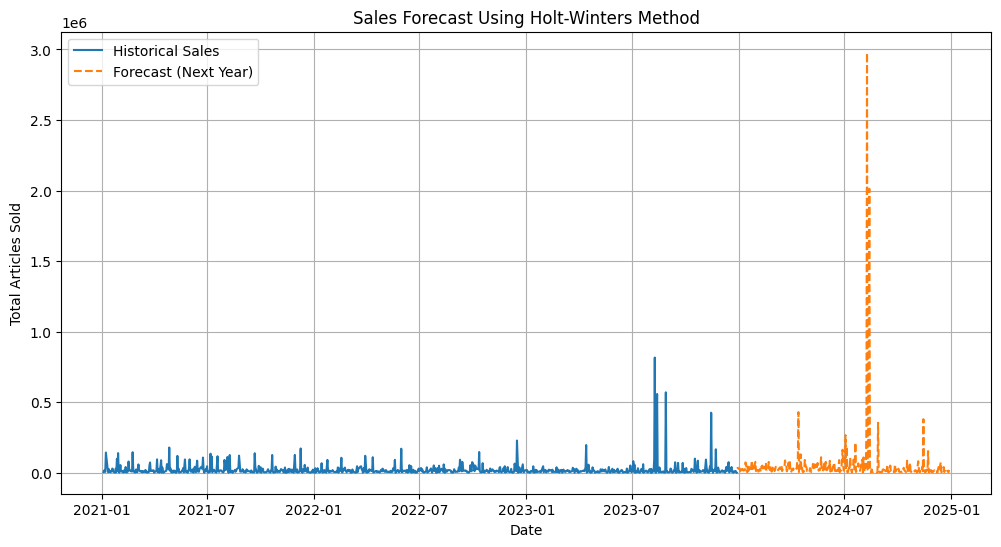

          Date  Forecasted_Sales
360 2024-12-24       8615.594067
361 2024-12-25      12903.020263
362 2024-12-26      12112.925457
363 2024-12-27       3479.541088
364 2024-12-28      20430.146155


In [12]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 2: Load and prepare the data
# Assuming you already have a DataFrame `df_grouped` with columns 'Fecha' (date) and 'Cantidad' (sales)
# Instead of using the potentially modified 'df_grouped', let's create a new one
# or use the original DataFrame (df) with the 'Cantidad' column
sales_data = df.groupby("Fecha")["Cantidad"].sum().reset_index()  # Assuming 'df' has 'Fecha' and 'Cantidad'


sales_data['Fecha'] = pd.to_datetime(sales_data['Fecha'])  # Ensure 'Fecha' is in datetime format
sales_data.set_index('Fecha', inplace=True)  # Set 'Fecha' as the index for time-series analysis
sales_data = sales_data.asfreq('D')  # Ensure daily frequency (adjust as needed)

# Fill missing values (if any) using interpolation
sales_data['Cantidad'] = sales_data['Cantidad'].interpolate(method='time')

# Step 3: Initialize and fit the Holt-Winters model
# Additive trend, multiplicative seasonality, and damped trend (adjust based on your data)
model = ExponentialSmoothing(
    sales_data['Cantidad'],
    trend='add',
    seasonal='mul',
    seasonal_periods=365
)
fitted_model = model.fit(optimized=True)

# Step 4: Forecast future values
forecast_steps = 365  # Predict for the next year
forecast = fitted_model.forecast(forecast_steps)

# Step 5: Plot the original data and the forecast
plt.figure(figsize=(12, 6))
# Use sales_data['Cantidad'] instead of df_grouped['Cantidad']
plt.plot(sales_data['Cantidad'], label='Historical Sales')
plt.plot(forecast, label='Forecast (Next Year)', linestyle='--')
plt.title('Sales Forecast Using Holt-Winters Method')
plt.xlabel('Date')
plt.ylabel('Total Articles Sold')
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Save predictions to a CSV file
forecast_df = pd.DataFrame({
    'Date': forecast.index,
    'Forecasted_Sales': forecast.values
})
forecast_df.to_csv('holt_winters_forecast.csv', index=False)

# Output the last few forecasted values
print(forecast_df.tail())

Comparison between Forecasted and Approximated Real Sales:
        Date  Forecasted_Sales  Real_Sales       Error  Absolute_Error  \
0 2024-12-24       8615.594067        8500  115.594067      115.594067   
1 2024-12-25      12903.020263       12500  403.020263      403.020263   
2 2024-12-26      12112.925457       12000  112.925457      112.925457   
3 2024-12-27       3479.541088        4000 -520.458912      520.458912   
4 2024-12-28      20430.146155       19500  930.146155      930.146155   

   Percentage_Error  
0          1.359930  
1          3.224162  
2          0.941045  
3         13.011473  
4          4.769980  

Accuracy Metrics:
Mean Absolute Error (MAE): 416.43
Mean Squared Error (MSE): 264917.77
Mean Absolute Percentage Error (MAPE): 4.66%


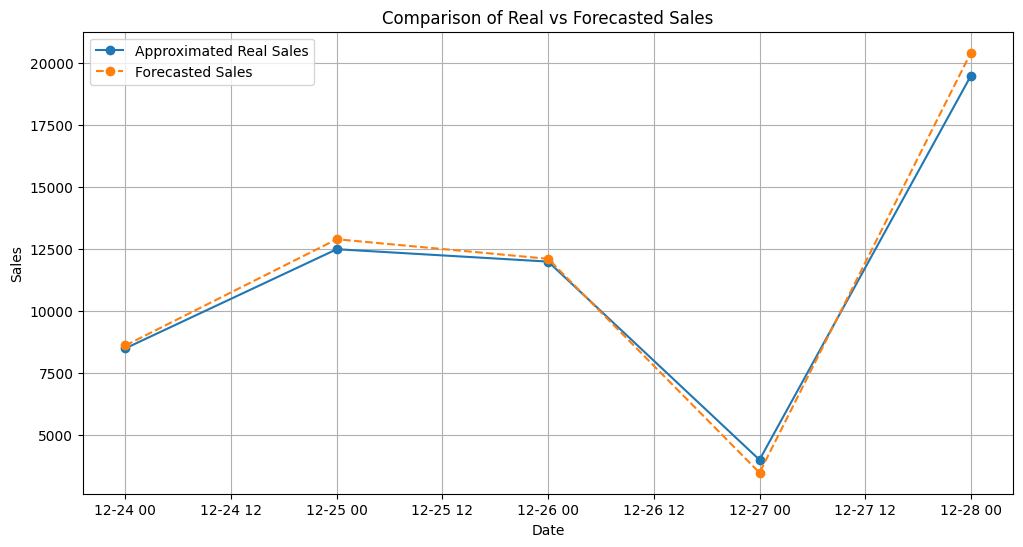

In [13]:
# Step 1: Create a DataFrame for real sales (approximated from the graph)
real_sales = pd.DataFrame({
    'Date': pd.to_datetime(['2024-12-24', '2024-12-25', '2024-12-26', '2024-12-27', '2024-12-28']),
    # Approximated values based on the graph
    'Real_Sales': [8500, 12500, 12000, 4000, 19500]
})

# Step 2: Merge the forecasted and real sales data
comparison_df = pd.merge(forecast_df, real_sales, on='Date', how='inner')

# Step 3: Calculate errors
comparison_df['Error'] = comparison_df['Forecasted_Sales'] - comparison_df['Real_Sales']
comparison_df['Absolute_Error'] = comparison_df['Error'].abs()
comparison_df['Percentage_Error'] = (comparison_df['Absolute_Error'] / comparison_df['Real_Sales']) * 100

# Step 4: Evaluate accuracy metrics
mae = comparison_df['Absolute_Error'].mean()  # Mean Absolute Error
mse = (comparison_df['Error'] ** 2).mean()  # Mean Squared Error
mape = comparison_df['Percentage_Error'].mean()  # Mean Absolute Percentage Error

# Step 5: Print the results
print("Comparison between Forecasted and Approximated Real Sales:")
print(comparison_df)
print("\nAccuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Step 6: Visualize the comparison
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Real_Sales'], label='Approximated Real Sales', marker='o')
plt.plot(comparison_df['Date'], comparison_df['Forecasted_Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.title('Comparison of Real vs Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
